In [246]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b><h3>Nonlinear Featurization via K-Means Model Stacking</h3></b>

PCA is very useful when the data lies in a linear subspace. But what if the data forms a more complicated shape? A flat plane (linear subspace) can be generalized to a manifold (nonlinear subspace), which can be thought of as a surface that gets stretched and rolled in various ways. If a linear subspace is a flat sheet of paper, then a rolled up sheet of paper is a simple example of a nonlinear manifold. Once rolled a 2D plane occupies 3D space, yet it is still essentially a 2D object. If we could somehow unroll the 'Swiss roll', we'd recover the 2D plane. This is the goal of nonlinear dimensionality reduction, which assumes that the manifold is simpler than the full dimension it occupies and attempts to unfold it.

The key observation is that even when a big manifold looks complicated, the local neighborhood around each pont can often be well approximated with a patch of flat surface. In other words, the patches to encode global structure using local structure. Nonlinear dimensionality reduction is also called nonlinear embedding or manifold learning. Nonlinear embeddings are useful for aggressively compressing high-dimensional data into low-dimensional data. They are often used for visualizations in two or three dimensions.

The goal of featur engineering, however, isnt so much to make the feature dimensions as low as possible, but to arrive at the right features for the task. For the 'Swiss roll' then the right features are those that represent the spatial characteristics of the data.

Clustering algorithms are usually not presented as techniques for local structure learning. But they in fact enable just that. Points that are close to each other (where "closeness" can be defined by a chosen metric) belong to the same cluster. Given a clustering , a data point can be represented by its cluster membership vector. If the number of clusters is smaller than the original number of features, then the new representation will have fewer dimensions than the original; the original data is compressed into a lower dimension. Compared to nonlinear embedding techniques, clustering may produce more features. But if the end goal is feature engineering instead of visualizatin, this is not a problem.

<b><h3>k-Means Clustering</h3></b>

k-means is a clustering algorithm. Clustering algorithms group data depending on how they are laid out in space. They are unsupervised in that they do not require any sort of label - it's the algorithms job to infer cluster labels based solely on the geometry of the data itself. A clustering algorithm depends on a metric - a measurement of closeness between data points. The most popular metric is the Euclidean distance or Euclidean metric. The Euclidean distance between two vectors $x$ and $y$ is te $l^2$ norm of $x-y$ ie $||x-y||_2$ or just $||x-y||$.

k-means establishes a hard clustering, meaning that each data point is assigned to one and only one cluster. The algorithm learns to position the cluster centers such taht the total sum of the Euclidean distance between each data point and its cluster center is minimized. The objective function is:

$min_{C_1,..., C_k, μ_1,...,μ_k}\sum_{i=1}^k\sum_{x⍷C_i}||x-μ_i||_2$

Each cluster $C_i$ contains a subset of data points. The center of cluster $i$ is equal to the average of all the data points in the cluster:

$μ_i$ = $\sum_{x⍷C_i}x/n_i$  where $n_i$ denotes the number of data points in cluster $i$.

The K-Means algorithm essentially returns an array of each point's cluster membership id.

In [247]:
n_data = 1000
seed = 1
n_centers = 4

# Generate random Gaussian blobs and run k-means
blobs, blob_labels = make_blobs(n_samples=n_data, n_features=2, centers=n_centers, random_state=seed)

clusters_blob = KMeans(n_clusters=n_centers, random_state=seed).fit_predict(blobs)

/Users/godfredowusu/Desktop/mlbooklearn/tfenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [248]:
# Generate data uniformly at random and run k-means
uniform = np.random.rand(n_data, 2)  # 1000, 2-dimensional points
clusters_uniform = KMeans(n_clusters=n_centers, random_state=seed).fit_predict(uniform)

/Users/godfredowusu/Desktop/mlbooklearn/tfenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [249]:
len(set([str(point) for point in uniform]))

1000

In [250]:
np.unique(clusters_blob)

array([0, 1, 2, 3], dtype=int32)

In [251]:
np.unique(clusters_uniform)

array([0, 1, 2, 3], dtype=int32)

In [252]:
len(set(clusters_blob))

4

(-0.04896482461137617,
 1.0494439418851034,
 -0.04812645356153522,
 1.0481047116161712)

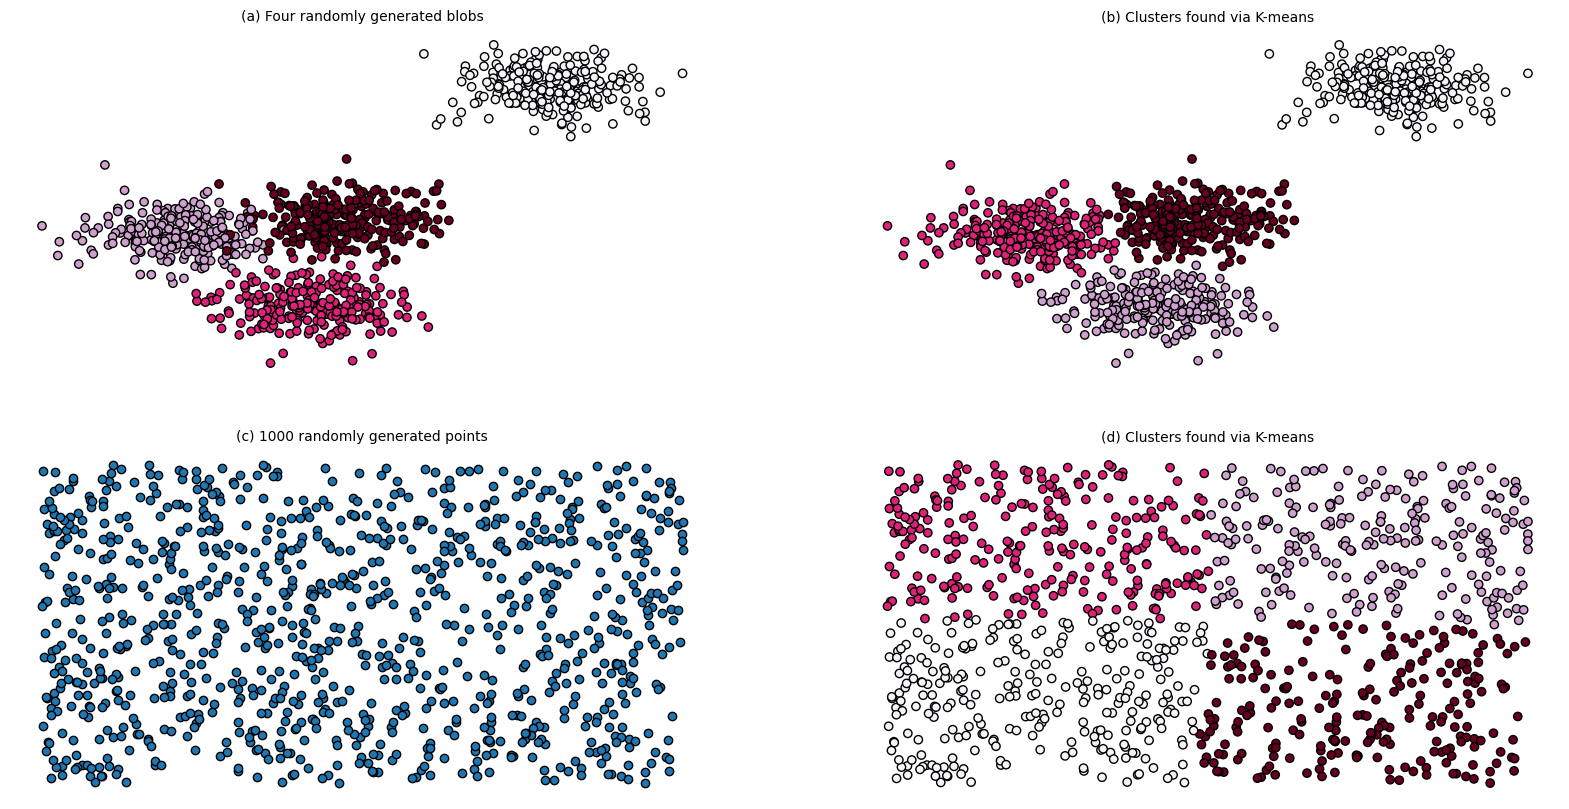

In [253]:
# Matplotlib incantations for visualizing results
figure = plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter(x=blobs[:,0], y=blobs[:,1], c=blob_labels, edgecolors='k', cmap='PuRd') 
plt.title('(a) Four randomly generated blobs', fontsize=10)
plt.axis('off')  # remove axis and borders

plt.subplot(222)
plt.scatter(blobs[:,0], blobs[:,1], c=clusters_blob, edgecolors='k', cmap='PuRd')
plt.title("(b) Clusters found via K-means", fontsize=10)
plt.axis('off')

plt.subplot(223)
plt.scatter(uniform[:,0], uniform[:,1], edgecolors='k')
plt.title("(c) 1000 randomly generated points", fontsize=10)
plt.axis("off")

plt.subplot(224)
plt.scatter(uniform[:,0], uniform[:,1], c=clusters_uniform, edgecolors='k', cmap='PuRd') # colored by membership
plt.title("(d) Clusters found via K-means", fontsize=10)
plt.axis("off")

<b><h3>Clustering as Surface Tiling</h3></b>

Common applications of clustering assume that there are natural clusters to be found; i.e, there are regions of dense data scattered in an otherwise empty space. In these situations, there is a notion of the correct number of clusters, and people have invented clustering indices the measure the quality of data groupings in order to select for $k$.

However, when data is spread out fairly uniformly, there is no longer a correct number of clusters. In this case, the role of a clustering algorithm is vector quantization i.e; partitioning the data into a finite number of chunks. The number of clusters can be selected based on acceptable approximation error when using quantized vectors instead of the original ones. Visually, this usage of k-means can be thought of a covering the data surface with patches.

In [254]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

/Users/godfredowusu/Desktop/mlbooklearn/tfenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


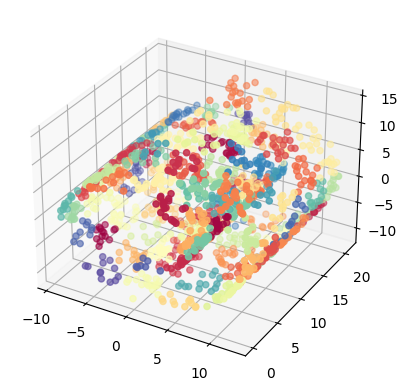

In [255]:
# Generate a noisy Swiss roll dataset
X, color = datasets._samples_generator.make_swiss_roll(n_samples=1500)

# Approximate the data with 100 k-means clusters
clusters_swiss_roll = KMeans(n_clusters=100, random_state=1).fit_predict(X)

# Plot the dataset with k-means cluster IDs as the color
fig2 = plt.figure()
ax   = fig2.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=clusters_swiss_roll, cmap='Spectral')

/Users/godfredowusu/Desktop/mlbooklearn/tfenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


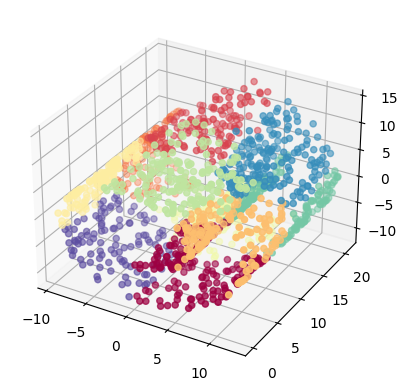

In [256]:
# Generate a noisy Swiss roll dataset
X, color = datasets._samples_generator.make_swiss_roll(n_samples=1500)

# Approximate the data with 10 k-means clusters
clusters_swiss_roll = KMeans(n_clusters=10, random_state=1).fit_predict(X)

# Plot the dataset with k-means cluster IDs as the color
fig2 = plt.figure()
ax   = fig2.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=clusters_swiss_roll, cmap='Spectral')

In the examples above, when k=100, the clusters are indeed very local and different sections of the manifold are mapped to different clusters. If k=10, data from different sections of the manifold are mapped to the same clusters.

If the data is distributed uniformly throught the space, then picking the right k boils down to a sphere-packing problem. In d dimensions, one could fit roughly $1/r^d$ spheres of radius $r$. Each k-means cluster is a sphere, and the radius is the maximum error of representing points in that sphere with the centroid. Uniform distribution is the worst-case scenario for k-means. If data density is not uniform, then we will be able to represent more data with fewer clusters. In general, it is difficult to tell how data is distributed in high-dimensional space. One can be conservative and pick a larger k, but it can't be too large, because k will become the number of features for the next modeling step.

<b><h3>k-Means Featurization for Classification</h3></b>

When using k-means as a featurization procedure, a data point can be represented by its cluster membership (a sparse one-hot encoding of the cluster membership categorical variable). If the target variable is also available, then we have the choice of giving that information as a hint to the clustering procedure.

One way to incorporate target information is to simply include the target variable as an additional input feature to the k-means algorithm. Since the objective is to minimize the total Euclidean distance over all input dimensions, the clustering procedure will attempt to balance similarity in the target value as well as in the original feature space. 

The target values can be scaled to get more or less attention from the clustering algorithm. Larger differences in the target will produce clusters that pay more attention to the classification boundary. Clustering algorithms analyze the spatial distribution of data. Therefore, k-means featurization creates a compressed spatial index of the data that can be fed into the model in next stage. This is an example of model stacking. The number of features generated via k-means featurization is the number of clusters.

In [257]:
# k-means featurizer

class KMeansFeaturizer:
    """ Transforms numeric data into k-means cluster memberships

    This transformer runs k-means on the input data and coverts each data point into the ID of the closest 
    cluster. If a target variable is present, it is scaled and included as input to k-means in order to 
    derive clusters that obey the classification boundary as well as group similar points together.

    """
    def __init__(self, k=100, target_scale=5.0, random_state=None):
        self.k = k
        self.target_scale = target_scale
        self.random_state = random_state
        self.cluster_encoder = OneHotEncoder().fit(np.array(range(k)).reshape(-1,1))
    

    def fit(self, X, y=None):
        """ Runs k-means on the input and finds centroids. """
        if y is None:
            # No target variable, just do plain k-means
            km_model = KMeans(n_clusters=self.k, 
                              n_init=20, 
                              random_state=self.random_state)
            km_model.fit(X)
            self.km_model_ = km_model
            self.cluster_centers_ = km_model.cluster_centers_
            return self
        
        # There is target information. Apply appropriate scaling and include it in the input data to k-means
        data_with_target = np.hstack((X,y[:,np.newaxis]*self.target_scale))

        # Build a pre-training k-mans model on data and target
        km_model_pretrain = KMeans(n_clusters=self.k, 
                                   n_init=20, 
                                   random_state=self.random_state)
        km_model_pretrain.fit(data_with_target)

        # Run k-means a second time to get the clusters in the original space without target info. 
        # Initialze using centroids found in pre-training.
        # Go through a single iteration of cluster assignment and centroid recomputation
        km_model = KMeans(n_clusters=self.k, 
                          init=km_model_pretrain.cluster_centers_[:,:2], # pre-training centroids, 2 features only
                          n_init=1,
                          max_iter=1) # single iteration of assignment to not lose label info
        km_model.fit(X)
        self.km_model_ = km_model
        self.cluster_centers_ = km_model.cluster_centers_
        return self
    
    def transform(self, X, y=None):
        """Outputs the closest cluster id for each input data point.

        Parameters
        ----------
        X : array-like or sparse matrix, shape=(n_data_points, n_features)

        y : vector of length n_data_points, optional, default None
            Target vector is ignored even if provided.

        Returns
        -------
        cluster_ids : array, shape[n_data_points,1]
        """
        clusters = self.km_model_.predict(X)
        return self.cluster_encoder.transform(clusters.reshape(-1,1))

    def fit_transform(self,X,y=None):
        """Runs fit followed by transform.
        """
        self.fit(X,y)
        return self.transform(X,y)

In [258]:
from scipy.spatial import Voronoi, voronoi_plot_2d 
from sklearn.datasets import make_moons

training_data, training_labels = make_moons(n_samples=2000, noise=0.2)
kmf_hint = KMeansFeaturizer(k=10, target_scale=10,random_state=seed).fit(training_data, training_labels)
kmf_no_hint = KMeansFeaturizer(k=10, random_state=seed).fit(training_data)

def kmeans_voronoi_plot(X,y,cluster_centers, ax):
    """ Plots the Voronoi diagram of the k-means clusters overlaid with the data"""
    ax.scatter(X[:,0], X[:,1], c=y, cmap='Set1', alpha=0.2)
    vor = Voronoi(cluster_centers)
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, alpha=0.5)

Text(0.5, 1.0, 'K-Means without Target Hint')

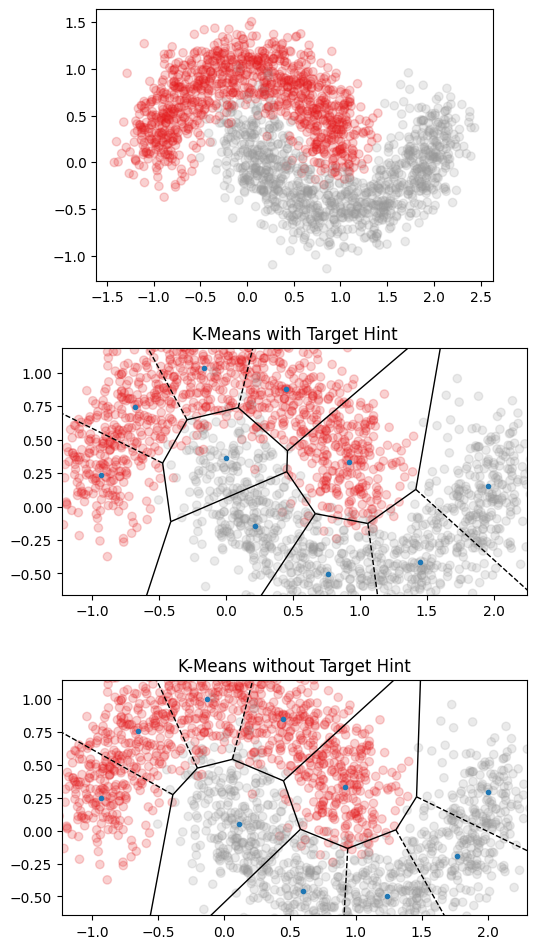

In [259]:
fig = plt.figure(figsize=(6,12))
ax0 = plt.subplot(311, aspect='equal')
ax0.scatter(training_data[:,0], training_data[:,1], c=training_labels, cmap='Set1', alpha=0.2)
ax = plt.subplot(312, aspect='equal')
kmeans_voronoi_plot(training_data, training_labels, kmf_hint.cluster_centers_, ax)
ax.set_title('K-Means with Target Hint')
ax2 = plt.subplot(313, aspect='equal')
kmeans_voronoi_plot(training_data, training_labels, kmf_no_hint.cluster_centers_, ax2)
ax2.set_title('K-Means without Target Hint')

In the example above, the number of clusters span the empty space between the two classes. When the clustering algorithm is given the target information, the cluster boundaries align much better along class boundaries.

Next, we can test the effectiveness of k-means features for classification. Below we apply logistic regression on the input data augmented with k-means cluster features. We compare the results against the support vector machine with radial bias function kernel (RBF SVM), k-nearest neighbors (kNN), random forest (RF), and gradient boosting tree (GBT) classifiers. RF and GBT are popular nonlinear classifiers with state-of-the-art performance. RBF SVM is a reasonable
nonlinear classifier for Euclidean space. kNN classifies data according to the average of its k nearest neighbors. The default input data to the classifiers consist of 2D coordinates of each data point. Logistic regression is also given the cluster membership features. As a baselie, we also try logistic regression on just the 2D coordinates.

In [260]:
# Classification with k-means features
import scipy
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Generate some test data from the same distribution as the training data
test_data, test_labels = make_moons(n_samples=2000, noise=0.3)

# Use the k-means featurizer to generate cluster features
training_cluster_features = kmf_no_hint.transform(training_data)

test_cluster_features = kmf_no_hint.transform(test_data)

# Form new input features with cluster features
training_with_cluster = scipy.sparse.hstack((training_data, training_cluster_features)) # add cluster as features

test_with_cluster = scipy.sparse.hstack((test_data, test_cluster_features))

# Build the classifiers
lr_cluster = LogisticRegression(random_state=seed).fit(training_with_cluster, training_labels)

classifier_names = ['LR', 'kNN', 'RBF SVM', 'Random Forest', 'Boosted Trees']

classifiers = [LogisticRegression(random_state=seed),
               KNeighborsClassifier(n_neighbors=5),
               SVC(gamma=2, C=1),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=5)]

for model in classifiers:
    model.fit(training_data, training_labels)

In [261]:
# Helper function to evaluate classifier performance using ROC
def test_roc(model, data, labels):
    if hasattr(model, "decision_function"):
        predictions = model.decision_function(data)
    else:
        predictions = model.predict_proba(data)[:,1]
    fpr, tpr, _ = sklearn.metrics.roc_curve(labels, predictions)
    return fpr, tpr



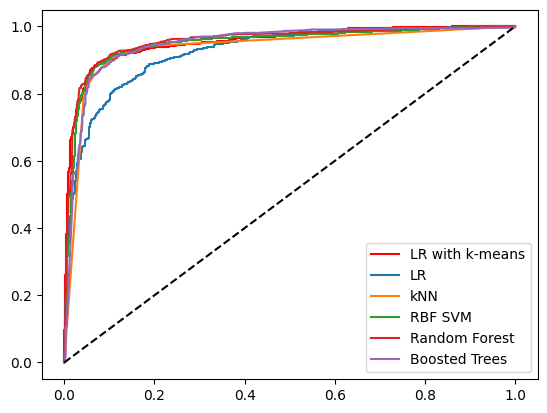

In [262]:
# Plot results
import matplotlib.pyplot as plt
plt.figure()
fpr_cluster, tpr_cluster = test_roc(lr_cluster, test_with_cluster, test_labels)
plt.plot(fpr_cluster, tpr_cluster, 'r-', label='LR with k-means')

for i, model in enumerate(classifiers):
    fpr, tpr = test_roc(model, test_data, test_labels)
    plt.plot(fpr,tpr,label=classifier_names[i])

plt.plot([0,1], [0,1], 'k--')
plt.legend()


The ROC plot shows that logistic regression performs much better with cluster features than without. In fact, with cluster features (with or without target hint, and 100 or 10 centroids), the linear classifier performs just as well as nonlinear classifiers. One minor caveat is that in this toy example, we did not tune the hyperparameters for any of the models. There may be performance differences once the models are fully tuned, but at least this shows that it is possible for logistic regression with k-means to be on par with non-linear classifiers. This is a nice result because linear classifiers are much cheaper to train than nonlinear classifiers. Lower computation cost allows us to try more models with different features in the same period of time, which increases the chance of ending up with a much better model. 

In [263]:
training_cluster_features.shape

(2000, 10)

In [264]:
test_cluster_features.shape

(2000, 10)

In [265]:
training_data.shape

(2000, 2)

In [266]:
training_with_cluster.shape

(2000, 12)

<b><h4>Alternative Dense Featurization</h4></b>

Instead of one-hot cluster membership, a data point can also be represented by a dense vector of its inverse distance to each cluster center (highest for its own member class). This retains more information than simple binary cluster assignment, but the representation is now dense. There is a trade-off here. One-hot cluster membership results in a very lightweight, sparse representation, but one might need a larger k to represent data of complex shapes. The number of clusters k becomes the number of features after one-hot encoding of the cluster id. 

Inverse distance representation is dense, which could be more expensive for the modeling step, but one might get away with a smaller k. An compromise between sparse and dense is to retain inverse distances for only p of the closest clusters. But now p is an extra hyperparameter to tune.

<b><h4>Potential for Data Leakage</h4></b>

Including the target variable in the k-means featurization step raises concerns of data leakage, but not as much as in the case of bin counting. If we use the same dataset for learning the clusters and building the classification model, then information about the target will have leaked into the input variables. As a result, accuracy evaluations on the training data will probably be overly optimistic, but the bias will go away when evaluating on a hold-out validation set or test set. Furthermore, the leakage will not be as bad as in the case of bin-counting statistics, because the lossy compression of the clustering algorithm will have abstracted away some of that information. To be extra careful about preventing leakage, hold out a separate dataset for deriving the clusters, just like in the case of bin counting.

<b><h3>Pros, Cons, and Gotchas</h3></b>

Using k-means to turn spatial data into features is an example of model stacking, where the input to one model is the output of another. Another example of stacking is to use the output of a decision tree-type model (random forest or gradient boosting tree) as input to a linear classifier. Stacking has become an increasingly popular technique in recent yeears. Nonlinear classifiers are expensive to train and maintain. The key intuition with stacking is to push the nonlinearities into the features and use a very simple, usually linear model as the last layer. The featurizer can be trained offline, which means that one can use expensive models that require more computation power or memory but generate useful features. The simple model at the top level can be quickly adapted to the changing distributions of online data. This is a great trade-off between accuracy and speed, and this strategy is often used in applications like targeted advertizing that require fast adaptation to changing data distributions.

k-means featurization is useful for real-valued, bounded numeric features that form clumps of dense regions in space. The clumps can be of any shape, because we can just increase the number of clusters to approximate them. (Unlike in the classic clustering setup, we are not concerned with discovering the 'true' number of clusters; we only need to cover them.)

k-means cannot handle feature spaces where the Euclidean distance does not make sense- i.e., weirdly distributed numeric variables or categorical variables. If the feature set contains those variables, then there are several ways to handle them:
- Apply k-means featurization only on the real-valued, bounded numeric features.
- Define a custom metric to handle multiple data types and use the k-medoids algorithms. (k-medoids is analogous to k-means but allows for arbitrary distance metrics.)
- Convert categorical variables to binning statistics, then featurize them using k-means.

Combined with techniques for handling categorical variables and time series, k-means featurization can be adapted to handle the kind of rich data that often appears in customer marketing and sales analytics. The resulting clusters can be thought of as user segments, which are very useful features for the next modeling step.